In [7]:
#Import Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn
from matplotlib import pyplot as plt
import datetime

In [3]:
#API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
tweet_df = pd.DataFrame(columns= ["Account", "Text", "Date",
                               "Compound","Positive","Neutral","Negative"])
tweet_df

,Account,Text,Date,Compound,Positive,Neutral,Negative


In [5]:
accounts = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
i = 0

for account in accounts:
    tweets = api.user_timeline(account, count = 100)
    print("\n" + account + "\n")
    for tweet in tweets:
        text = tweet["text"]
        tweet_date = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        # Sentiment analysis
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        print(text)
        print(f"  Compound: {compound}  |  Positive: {pos}  |  Neutral: {neu}  |  Negative: {neg}")
        # Store in df
        tweet_df.at[i, "Account"] = account
        tweet_df.at[i, "Text"] = text
        tweet_df.at[i, "Date"] = datetime.date(tweet_date).strftime("%m/%d/%y")
        tweet_df.at[i, "Compound"] = round(compound,3)
        tweet_df.at[i, "Positive"] = round(pos,3)
        tweet_df.at[i, "Neutral"] = round(neu,3)
        tweet_df.at[i, "Negative"] = round(neg,3)
        i += 1


@BBC

Hugh Fearnley-Whittingstall is on a mission, asking food producers, restaurants and the government to confront Brit… https://t.co/EcfjGY9Hqo
  Compound: -0.1779  |  Positive: 0.0  |  Neutral: 0.898  |  Negative: 0.102
☀️🛶 How an isolated indigenous community in Ecuador is protecting the Amazon jungle with its first solar powered ca… https://t.co/yHNXh2C0ZO
  Compound: -0.1531  |  Positive: 0.077  |  Neutral: 0.818  |  Negative: 0.105
🌱🍓 A man has told of how he 'got his mum back' after a diagnosis of Alzheimer's, in part, by getting her to follow… https://t.co/Bj8a8iAK61
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 0.0
❤️🐿 The dating scene is tough when you're a red squirrel... https://t.co/BUTI5sOp3R
  Compound: -0.128  |  Positive: 0.0  |  Neutral: 0.87  |  Negative: 0.13
🐧 🤣 When penguins... HONK!... interrupt... HONK!... your TV interview... HONK!   
#WorldPenguinDay https://t.co/mFUZec36Ne
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 


@CBS

Celebrate #DNADay by letting your forensic flag fly and revisit some classic episodes of @CSI_CBS on CBS All Access… https://t.co/YCbHDK2r4b
  Compound: 0.5719  |  Positive: 0.163  |  Neutral: 0.837  |  Negative: 0.0
Get ready for big reveals, dramatic conclusions, and huge guest stars! Find out more about the 2017-2018 season fin… https://t.co/xcBChnjEvH
  Compound: 0.6239  |  Positive: 0.221  |  Neutral: 0.779  |  Negative: 0.0
Who’s ready to see these moves? 🕺 Tune in to the @latelateshow’s Carpool Karaoke Primetime Special TONIGHT at 10/9c! https://t.co/gjrURqXaPN
  Compound: 0.6696  |  Positive: 0.244  |  Neutral: 0.756  |  Negative: 0.0
The 53rd #ACMawards turned into one big party when @KeithUrban and @juliamichaels performed their upbeat single "Co… https://t.co/Q3Zj3EzuNs
  Compound: 0.4019  |  Positive: 0.137  |  Neutral: 0.863  |  Negative: 0.0
A blind date was all it took. Learn more about Meghan Markle and her road to royalty from the people who know her b… https://


@CNN

General Electric was blasted by workers, retirees and shareholders bemoaning the downfall of the company they love… https://t.co/fAARRwrAa4
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 0.0
Now it’s time for your questions. Hear what former FBI Director James Comey has to say in a live town hall tonight,… https://t.co/UyYHtJE8k7
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 0.0
We're in Sacramento, California, where authorities are expected to announce the arrest of a suspect in the decades-… https://t.co/OhmGMu1HYa
  Compound: -0.5574  |  Positive: 0.0  |  Neutral: 0.777  |  Negative: 0.223
"Dr. (Ronny) Jackson's record as a White House physician has been impeccable," WH press secretary Sarah Sanders sai… https://t.co/6j4zpDaXyg
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 0.0
Hospitals may soon have to post prices for patients online https://t.co/Un6qsULG9z https://t.co/Yfeoqnbo9p
  Compound: 0.0  |  Positive: 0.0  |  N


@FoxNews

Scott Pruitt's time as EPA administrator dogged by questions about first-class travel, pay raises https://t.co/MA2D6zFWSW
  Compound: -0.1027  |  Positive: 0.0  |  Neutral: 0.909  |  Negative: 0.091
Moments ago, President @realDonaldTrump responded to music icon @kanyewest, who today said that he loves the presid… https://t.co/vMQWHFb49D
  Compound: 0.5719  |  Positive: 0.179  |  Neutral: 0.821  |  Negative: 0.0
Earlier, @VP tweeted his praise for French President @EmmanuelMacron and the bond between the U.S. and France.… https://t.co/xhHijwPmAH
  Compound: 0.5574  |  Positive: 0.175  |  Neutral: 0.825  |  Negative: 0.0
Bill Clinton 'casually encouraged' Trump to run for president before 2016 race: book - via @brookefoxnews 
https://t.co/aog2Jay3rr
  Compound: 0.4939  |  Positive: 0.231  |  Neutral: 0.769  |  Negative: 0.0
“This really is the most prolific unsolved serial murder case in modern history.” 

Trace Gallagher reports on the… https://t.co/TBR0lVBs2Q
  Compound: -0


@nytimes

“Let us face it: There is no Planet B,” President Macron said. “Let us work together in order to make our planet gr… https://t.co/iqjcBr2gZX
  Compound: -0.296  |  Positive: 0.0  |  Neutral: 0.913  |  Negative: 0.087
Emmanuel Macron spoke critically of Trump's foreign policy, trade and environmental decisions in a speech to Congre… https://t.co/Q3VmLsl41N
  Compound: 0.0  |  Positive: 0.0  |  Neutral: 1.0  |  Negative: 0.0
Comcast is in a takeover battle with Rupert Murdoch’s 21st Century Fox for control over the British satellite broad… https://t.co/CYRT8r1Msl
  Compound: -0.3818  |  Positive: 0.0  |  Neutral: 0.874  |  Negative: 0.126
Scott Pruitt may blame his staff when Congress grills him Thursday on spending and ethics, an internal EPA memo sho… https://t.co/wK3cLsqoBU
  Compound: -0.34  |  Positive: 0.0  |  Neutral: 0.893  |  Negative: 0.107
Sarah Huckabee Sanders said she was “not going to go line by line on every outrageous thing out there right now” https://t.co/f8

In [6]:
#Save to CSV
tweet_df.to_csv("Last100Tweets.csv", index = False)

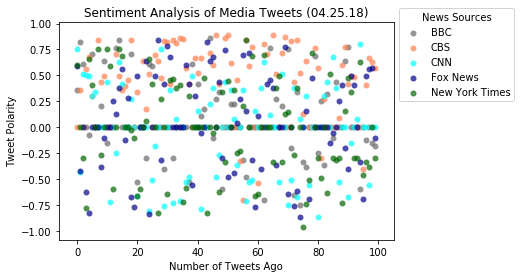

In [14]:
colors = ["dimgray", "coral", "cyan", "darkblue", "darkgreen"]
labels = ["BBC", "CBS", "CNN", "Fox News", "New York Times"]

plt.clf()

fig = plt.figure()
ax = plt.subplot()

for i, account in enumerate(accounts):
    df = tweet_df[tweet_df["Account"] == account]
    plt.scatter(np.arange(99,-1,-1),
            df["Compound"], marker = "o", linewidth = 0,
            alpha = .7, color = colors[i], edgecolors = "black",
            label = labels[i]
            )

ax.legend(loc='center left', bbox_to_anchor=(1,.85),
         title = "News Sources")
plt.title("Sentiment Analysis of Media Tweets " +
         datetime.datetime.now().strftime("(%m.%d.%y)"))
plt.xlabel("Number of Tweets Ago")    
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment Analyis of Media Tweets.png")
plt.show()

In [15]:
sentiment = tweet_df[["Account", "Compound", "Positive", "Neutral", "Negative"]]
sentiment[["Compound", "Positive", "Neutral", "Negative"]] = sentiment[["Compound", "Positive", "Neutral", "Negative"]].apply(pd.to_numeric, errors='coerce')
new_df = sentiment.groupby("Account").mean().reset_index()
new_df

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Account,Compound,Positive,Neutral,Negative
0,@BBC,0.06957,0.07105,0.88848,0.04046
1,@CBS,0.38700,0.17625,0.80499,0.01876
2,@CNN,-0.02645,0.07135,0.84519,0.08342
3,@FoxNews,0.04722,0.09807,0.81549,0.08645
4,@nytimes,-0.01030,0.07992,0.83760,0.08248
